## Making trees work - Exercise
```In this exercise you will experience with Decision Trees and Random Forests. During this part you will explore the different features of them and will plot your results. Hence, whenever exploration tasks are marked with (*), know that you are asked to plot two graphs (on the same plot): the training score against the explored feature and the test score against it.```

```~Ittai Haran```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

```Read the dataset. In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable.```

```the dataset can be found in: ```https://drive.google.com/open?id=1t_P64gM1M1_c2n4PvH7AZoELH2CNh6ui

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('insurance_fixed.csv')
X = df.drop(['Response'], axis = 1)
Y = df['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3)

In [3]:
df['Response'].unique()

array([8, 4, 1, 6, 2, 7, 3, 5], dtype=int64)

```We will start by using Decision trees. Use a simple DecisionTreeClassifier with default values to predict on your train and on your test. Evaluate the model using the accuracy metric, which you can find in sklearn.```

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train,Y_train)
y_pred_test = decision_tree_clf.predict(X_test)
y_pred_train = decision_tree_clf.predict(X_train)
print('TEST ACCURACY : ' + str(accuracy_score(Y_test,y_pred_test)))
print('TRAIN ACCURACY : ' + str(accuracy_score(Y_train,y_pred_train)))

TEST ACCURACY : 0.4255964075217513
TRAIN ACCURACY : 0.9999518837511427


```Unfortunately, you are at overfit. Now let's try to get better. Try playing with the max depth of the tree, for``` $1\leq depth \leq25$ ```(*) (This means you are asked to plot some graphs, remember? :) )```

```Choose the optimal max_depth based on the graph you got.```

In [6]:
# from sklearn.model_selection import GridSearchCV

# parameters={'max_depth': range(1,26)}
# clf_tree=DecisionTreeClassifier()

In [7]:
# clf=GridSearchCV(clf_tree,parameters,scoring='accuracy')
# clf.fit(X_train,Y_train)

In [8]:
# scores_df = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')
# scores_df.head()

#scores_df_for_plot = scores_df[['param_max_depth' , 'mean_test_score' , 'std_test_score']]

In [9]:
# import seaborn as sns
# sns.lineplot(data = scores_df_for_plot, x='param_max_depth' , y='mean_test_score')

In [10]:
accuracy_train_test_by_depth = {}
for i in range(1,26):
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_depth[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
 

In [11]:
df = pd.DataFrame(accuracy_train_test_by_depth , index=['test_accuracy' , 'train_accuracy']).T

Text(0.5, 1.0, 'TRAIN-TEST ACCURACY BY MAX DEPTH PARAMETER')

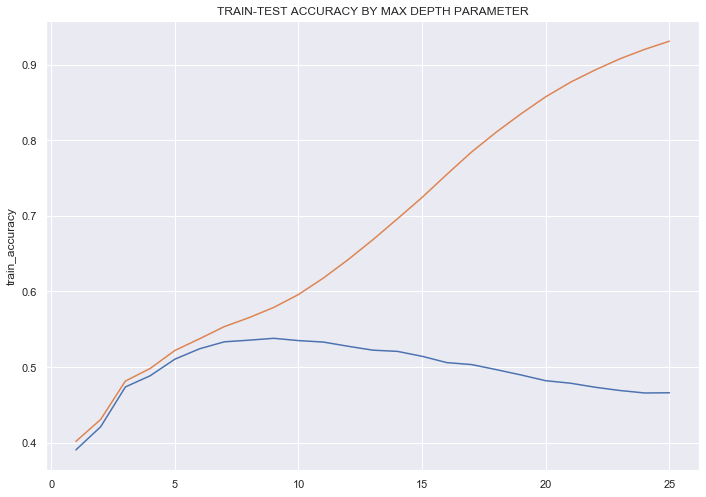

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data= df, x=df.index , y='test_accuracy')
sns.lineplot(data= df, x=df.index , y='train_accuracy')
plt.title('TRAIN-TEST ACCURACY BY MAX DEPTH PARAMETER')

```Choose the best max_depth you found. Now try playing with min_samples_leaf. use the following values:
[1, 10, 100, 300,700, 1000]. Do it also with max_depth = 20. What can we learn from the graphs? Please answer the question ```$\ \underline{in\ another\ cell}$```.(*)```

In [13]:
df.sort_values(by='test_accuracy' , ascending=False) #it looks like the best depth for us is 8 - small difference betweem test & train with good accuracy

,test_accuracy,train_accuracy
9,0.538030,0.578863
8,0.535560,0.565318
10,0.534999,0.595944
7,0.533371,0.553481
11,0.533090,0.617548
12,0.527533,0.641895
6,0.524165,0.537410
13,0.522369,0.668142
14,0.520741,0.696026
15,0.514230,0.724342


In [14]:
#train with best deapth 8
accuracy_train_test_by_min_samples_leaf = {}
for i in [1, 10, 100, 300,700, 1000]:
    clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=i).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_min_samples_leaf[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))

In [15]:
df_min_samples_leaf = pd.DataFrame(accuracy_train_test_by_min_samples_leaf , index=['test_accuracy' , 'train_accuracy']).T

Text(0.5, 1.0, 'TRAIN-TEST ACCURACY BY MIN SAMPLES LEAF')

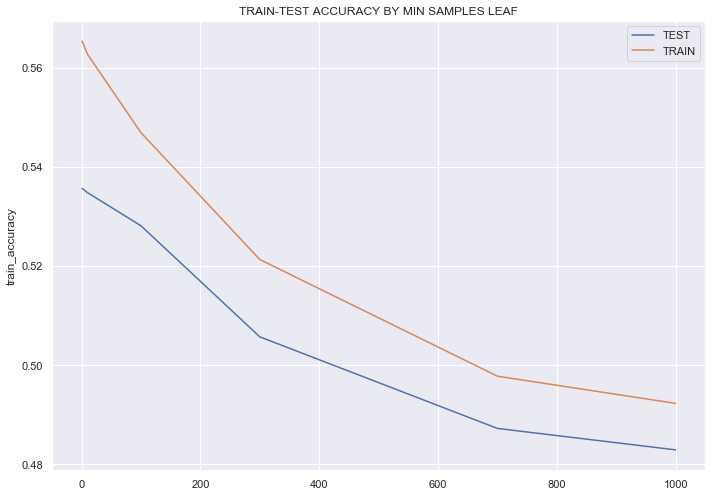

In [16]:
sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='test_accuracy' , legend='full', label='TEST')
sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='train_accuracy', legend='full', label='TRAIN')
plt.title('TRAIN-TEST ACCURACY BY MIN SAMPLES LEAF')

In [17]:
#from the graph above we can see that with the 'best' max_depth parameter (8) - the bigger the min sample leaf is than the accuracy reduces!

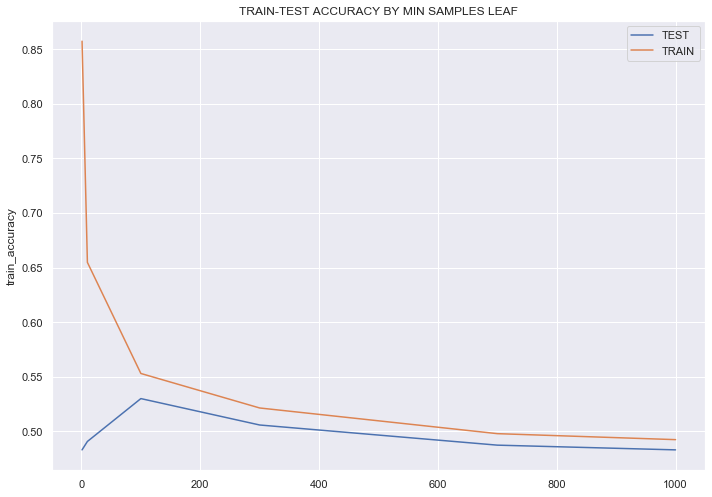

In [18]:
#train with best deapth 20
accuracy_train_test_by_min_samples_leaf = {}
for i in [1, 10, 100, 300,700, 1000]:
    clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=i).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_min_samples_leaf[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
    
df_min_samples_leaf = pd.DataFrame(accuracy_train_test_by_min_samples_leaf , index=['test_accuracy' , 'train_accuracy']).T

sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='test_accuracy' , legend='full' , label='TEST')
sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='train_accuracy', legend='full', label='TRAIN')
plt.title('TRAIN-TEST ACCURACY BY MIN SAMPLES LEAF')
plt.legend()

In [19]:
#from the graph above we can see that using max_depth parameter to 20 - in the low values of min sample leaf there is a big overfitting, it starts to get balanced arount MIN_SAMPLES_LEAF=100 and above..but again - the bigger the min sample leaf is than the accuracy reduces!

```Decision Tree is a very nice algorithm, especially because it is very intuitive and explainable. We can even draw it!
Train a simple Decision Tree with max_depth = 3. Call it basic_tree and run the cell below. Examine the file tree.png you created.```

In [20]:
basic_tree = DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)

In [21]:
X_train

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
13115,1,26,0.230769,2,3,1,0.611940,0.690909,0.290795,0.488359,...,0,0,0,1,0,0,0,0,0,0
33750,1,26,0.076923,2,3,1,0.089552,0.836364,0.330544,0.409190,...,0,0,0,0,0,0,0,0,0,0
18070,1,26,0.076923,2,3,1,0.656716,0.654545,0.320084,0.585269,...,0,0,0,0,0,0,0,0,0,0
15246,1,26,0.230769,2,3,1,0.388060,0.781818,0.194561,0.251128,...,0,0,0,0,0,0,0,0,0,0
25667,1,26,1.000000,2,3,1,0.447761,0.654545,0.209205,0.376858,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17511,1,26,0.230769,2,3,1,0.373134,0.727273,0.372385,0.586182,...,0,0,0,0,0,0,0,0,0,0
43471,1,26,0.076923,2,3,1,0.388060,0.690909,0.372385,0.632699,...,0,0,0,1,0,0,0,0,0,0
53502,1,26,0.076923,2,3,1,0.895522,0.618182,0.207113,0.408688,...,0,1,0,0,0,0,0,0,0,0
41900,1,10,0.487179,2,3,1,0.223881,0.636364,0.246862,0.467454,...,0,0,0,1,0,0,0,0,0,0


In [22]:
# from sklearn.tree import export_graphviz
# export_graphviz(basic_tree, out_file = 'tree.dot', filled  = True,
#                 rounded = True, feature_names = X_train.columns)
# !dot -Tpng tree.dot -o tree.png

In [23]:
Y_train_N = sorted(Y_train.unique())
Y_train_N = list(map(str,Y_train_N))
Y_train_N

['1', '2', '3', '4', '5', '6', '7', '8']

In [24]:
Y_train.value_counts()

8    13755
6     7879
7     5601
2     4557
1     4283
5     3779
4      996
3      716
Name: Response, dtype: int64

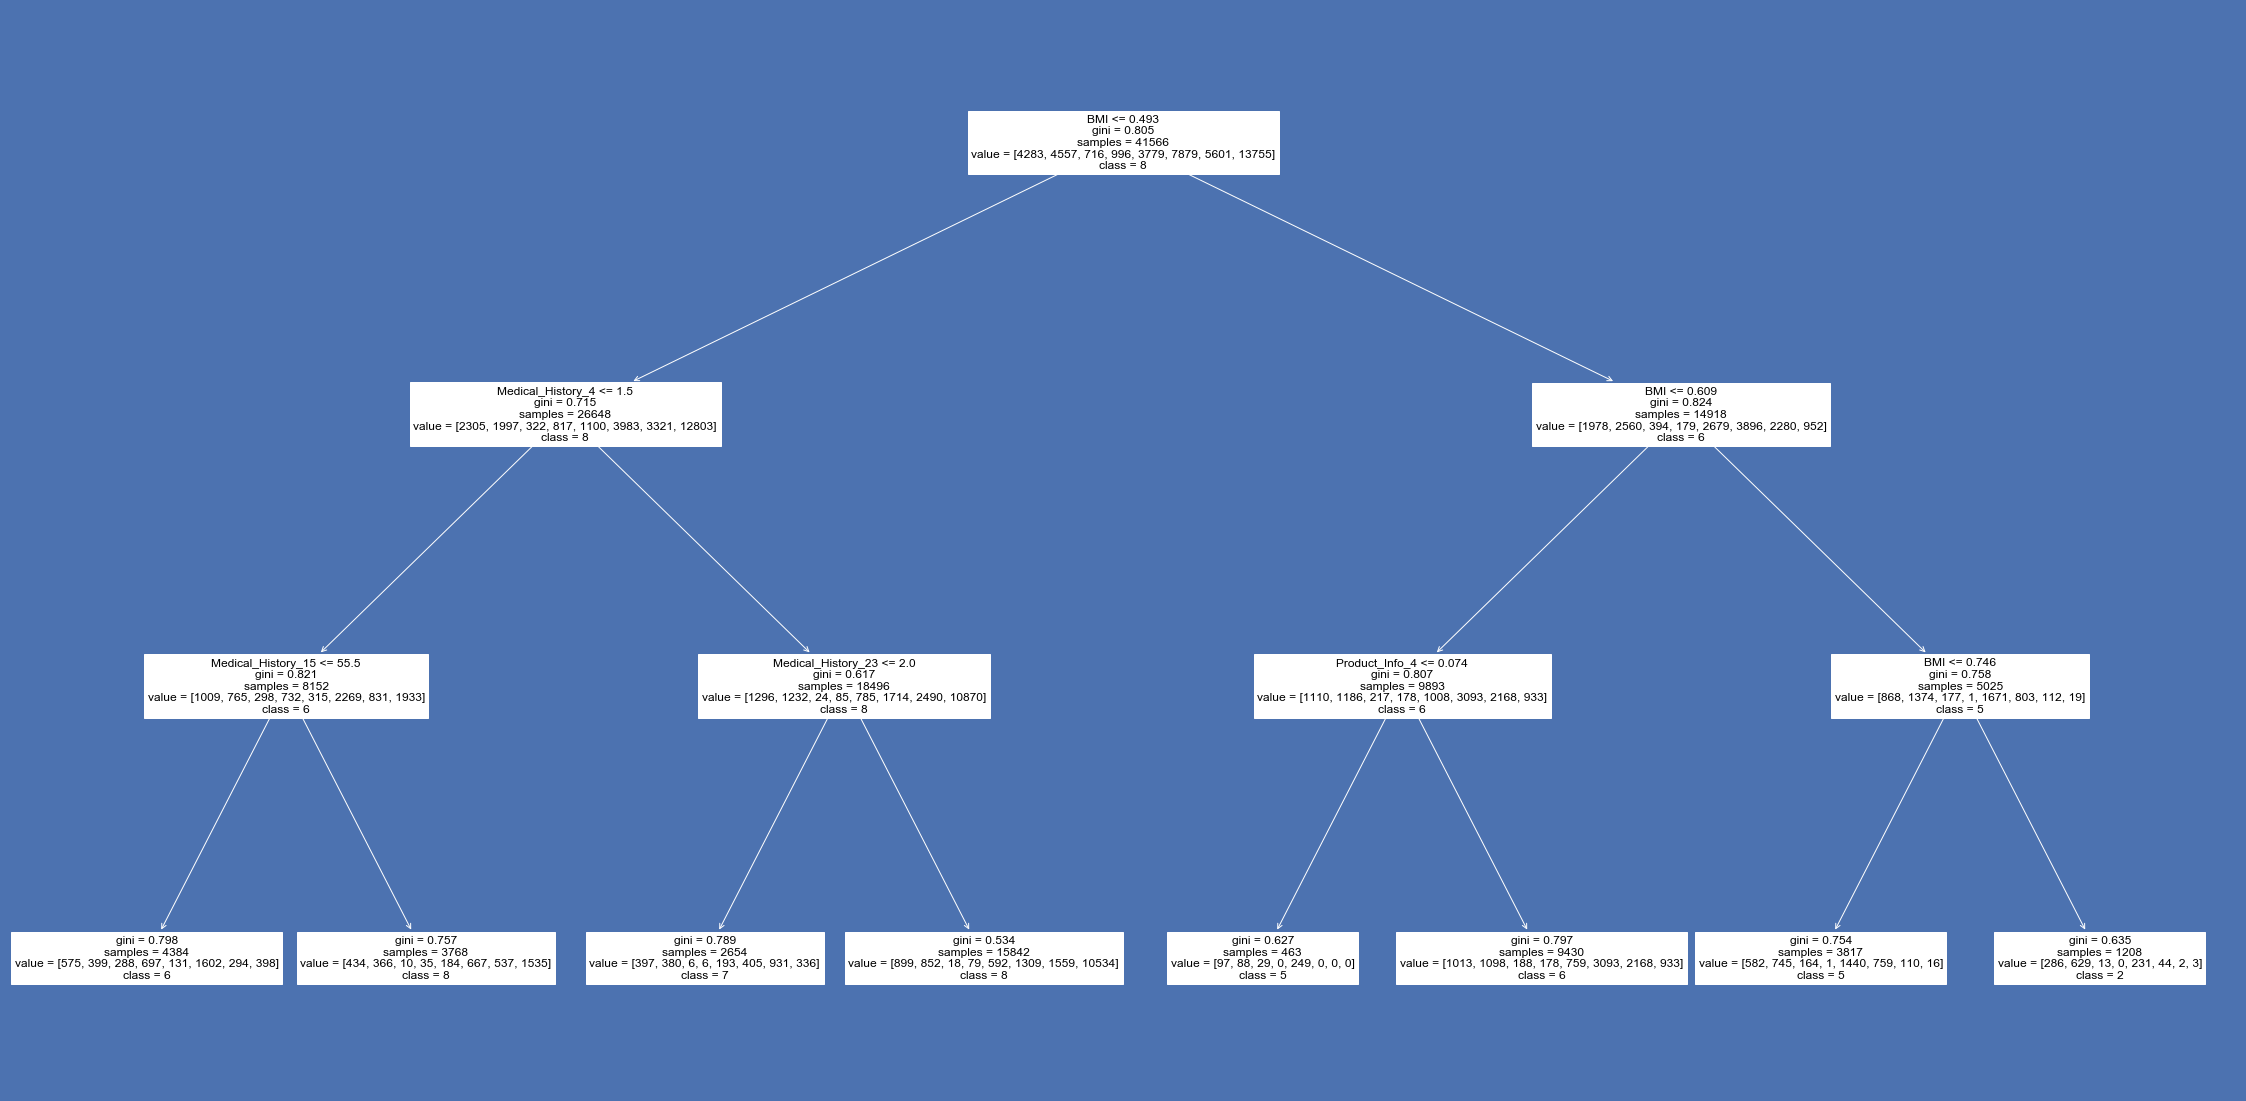

In [25]:
#sns.set_style("darkgrid")
import matplotlib as mpl
from sklearn.tree import plot_tree
#plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

fig, ax = plt.subplots(figsize=(40, 20), facecolor='b')
plot_tree(basic_tree, rotate=True, ax=ax , fontsize=12 , feature_names=X_train.columns , class_names=Y_train_N)
plt.show()

```Look at the tree you got. What, would you say, are the most important features?
As you recall, we talked about feature importance in the lecture notes. Use the attribute feature_importance_ of your tree to get a list of the most important features.```

In [26]:
#the 10 most feature important
pd.DataFrame(list(zip(basic_tree.feature_importances_,X_train.columns)) , columns=['value', 'feature_importance']).sort_values('value' ,ascending=False ).head(10)

,value,feature_importance
9,0.540594,BMI
39,0.189718,Medical_History_4
58,0.168121,Medical_History_23
50,0.067095,Medical_History_15
2,0.034471,Product_Info_4
90,0.000000,Medical_Keyword_14
89,0.000000,Medical_Keyword_13
91,0.000000,Medical_Keyword_15
88,0.000000,Medical_Keyword_12
80,0.000000,Medical_Keyword_4


```We will now move to Random Forest. Repeat the exlporations tasks with a Random forest with 100 trees (max depth and min samples leaf). In addition, vary the number of trees between 10 and 400, while maintaining low max_depth (*) and the max_feature parameter, between 0.1 and 1 (*). Try explaining the graphs you see ```$\ \underline{in\ a\ different\ cell}$```. Use the flag n_jobs = -1 in your experiments to accelerate your computation time. Make sure to understand where your model is overfitted.```

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
#EXPLORE MAX DEPTH AND SIMPLE LEAF - USING RANDOM FOREST WITH 100 TREES:

accuracy_train_test_by_max_depth = {}
for i in range(1,26):
    clf = RandomForestClassifier(n_estimators=100, max_depth=i , n_jobs=-1).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_max_depth[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
    
df_max_depth = pd.DataFrame(accuracy_train_test_by_max_depth , index=['test_accuracy' , 'train_accuracy']).T

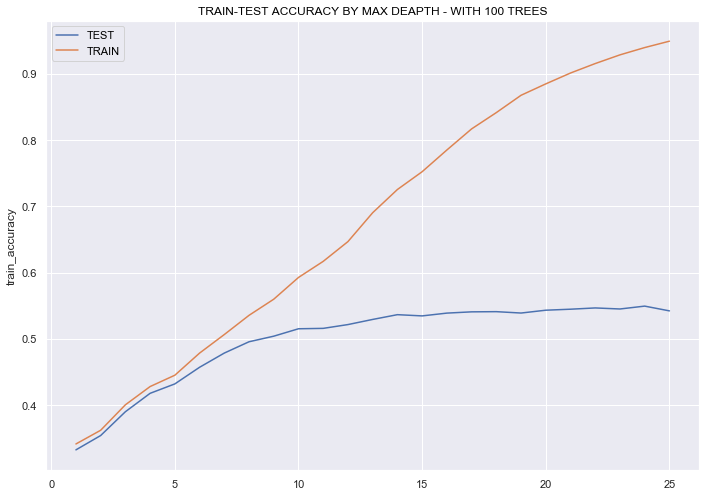

In [34]:
sns.lineplot(data= df_max_depth, x=df_max_depth.index , y='test_accuracy' , legend='full' , label='TEST')
sns.lineplot(data= df_max_depth, x=df_max_depth.index , y='train_accuracy', legend='full', label='TRAIN')
plt.title('TRAIN-TEST ACCURACY BY MAX DEAPTH - WITH 100 TREES')
plt.legend()

In [35]:

accuracy_train_test_by_min_samples_leaf = {}
for i in [1, 10, 100, 300,700, 1000]:
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=i , n_jobs=-1).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_min_samples_leaf[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
    
df_min_samples_leaf = pd.DataFrame(accuracy_train_test_by_min_samples_leaf , index=['test_accuracy' , 'train_accuracy']).T

In [36]:
sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='test_accuracy' , legend='full' , label='TEST')
sns.lineplot(data= df_min_samples_leaf, x=df_min_samples_leaf.index , y='train_accuracy', legend='full', label='TRAIN')
plt.title('TRAIN-TEST ACCURACY BY MIN SAMPLES LEAF - WITH 100 TREES')
plt.legend()

In [38]:
accuracy_train_test_by_num_of_trees = {}
for i in range(10,401):
    clf = RandomForestClassifier(n_estimators=i, max_depth=5 , n_jobs=-1).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_num_of_trees[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
    
df_num_of_trees = pd.DataFrame(accuracy_train_test_by_num_of_trees , index=['test_accuracy' , 'train_accuracy']).T

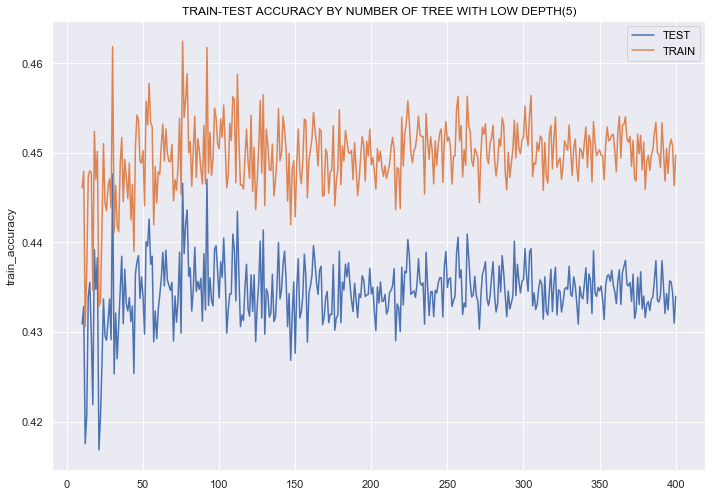

In [40]:
sns.lineplot(data= df_num_of_trees, x=df_num_of_trees.index , y='test_accuracy' , legend='full' , label='TEST')
sns.lineplot(data= df_num_of_trees, x=df_num_of_trees.index , y='train_accuracy', legend='full', label='TRAIN')
plt.title('TRAIN-TEST ACCURACY BY NUMBER OF TREE WITH LOW DEPTH(5)')
plt.legend()

In [ ]:
max_feature

accuracy_train_test_by_max_feature = {}
for i in np.arange(0.1,1.1,0.1):
    clf = RandomForestClassifier(n_estimators=i, max_depth=5 , n_jobs=-1).fit(X_train,Y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train_test_by_num_of_trees[i] = (accuracy_score(Y_test,y_pred_test),accuracy_score(Y_train,y_pred_train))
    
df_num_of_trees = pd.DataFrame(accuracy_train_test_by_num_of_trees , index=['test_accuracy' , 'train_accuracy']).T

In [42]:

    print (i)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


```As you could see, at least one of your graphs turned out to be very noisy. Use K Fold cross validation to evalute your model more accurately. In K Fold cross validation we split our data into K segments, and for each ```$\ 1\leq i\leq K\ $``` we test our model on the i-th segment while training it using the others.```

```Use the Random Forest to surpass the best score you got using Decision Tree.```

## Extra thinking on feature importance

```We talked about feature importance in the lecture notes. get the feature importance of each feature using a decision tree and using a random forest. Use in both cases the best hyper parameters you found so far. Discuss the differences between the answers``` $\underline{in\ a\ cell}$.

```We can define a concept of feature importance for linear regression: Suppose you have two features, ```$x_1$ ```and``` $x_2$. ```Suppose that you got a linear regression of the form```

$y = 100\cdot x_1 + 1\cdot x_2$

```What feature is more important? What if we have -100 instead of 100? Generalize this idea to any number of features. Train a linear regression on your data and get the feature importances.```

In [ ]:
from sklearn.linear_model import LinearRegression

## Ensemble methods and stacking
```In this part we will explore the concept of model stacking: that is, training a model, the combining model, on the outputs of several other models. Hence, the stacking method has two steps: first we train our models, and than we train the combining model using the outputs of those models.```

```In the setting of stacking models it is very important to train the several models on one segment of the data and train the combining model on another segment. Hence, start by splitting the data to 3 segments: train_1 segment, 35% of the data, train_2 segment, 35% of the data, and test segment, the last 30% of the data.```

```Our first experiment is as follows: train a random forest of simple decision trees (30 trees, max_depth = 3), using train_1. Use the estimators of the forest to create 30*8=240 features: for each estimator get the probabilities it gives for the target to belong to any of the classes. You can get the list of the estimators using RandomForestClassifier.estimators_ and have the probabilities mentioned using model.predict_proba.
Using the new features you got (and them only), train a logistic regression (LogisticRegression).
Compare between the accuracy of the first random forest (on the test segment) and the accuracy of the stacked models (again, on the test segment).```

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


```We will conduct a similar experiment: create a set of at least 5 different models, of different kinds - use algorithms we talked about in the course. Stack them to get a better model. Compare the accuracies of the models to the accuracy of your stacked model.```

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression, RidgeClassifier, RidgeClassifierCV

```As we said earlier, it is very important use two different train segments. What happens if you use the same train segment in both steps of the stacked model? Note that you now use more data to train your models, and also your combining model. Do you get better results? Do it and explain your results ```$\underline{\ in\ a\ cell\ below.}$